In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('TaxiData.csv')

# print(df['trip_seconds'].isna().sum())
df['trip_seconds'] = df['trip_seconds'].fillna(0)

# df.sort_values(by='trip_miles').tail(10)

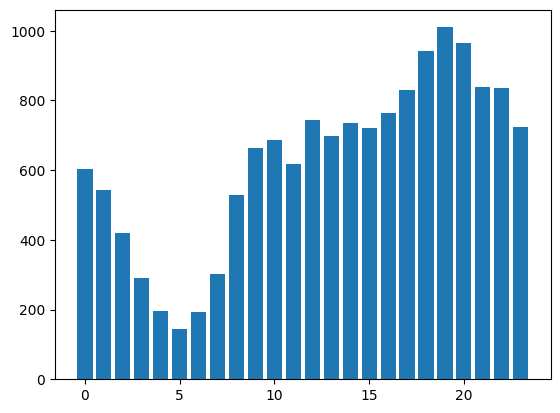

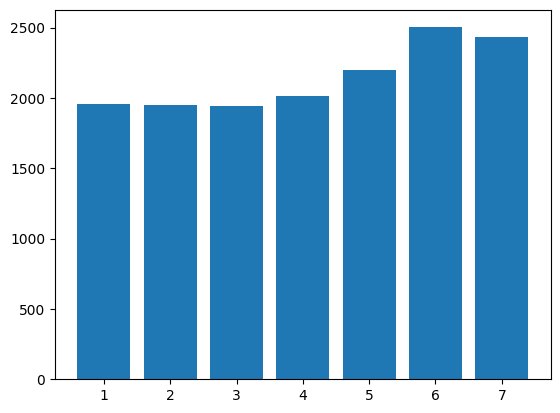

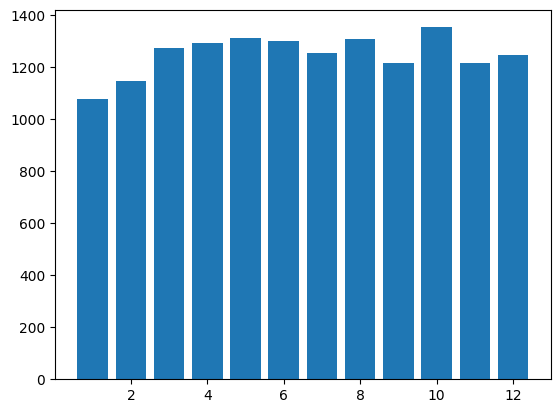

In [21]:
# 2.a

df_start_hour = df['trip_start_hour']
hour_freq = df_start_hour.value_counts()
plt.bar(hour_freq.index, hour_freq)
plt.savefig('2a_1.png')
plt.show()
plt.close()

df_start_day = df['trip_start_day']
day_freq = df_start_day.value_counts()
plt.bar(day_freq.index, day_freq)
plt.savefig('2a_2.png')
plt.show()
plt.close()

df_start_month = df['trip_start_month']
month_freq = df_start_month.value_counts()
plt.bar(month_freq.index, month_freq)
plt.savefig('2a_3.png')
plt.show()
plt.close()

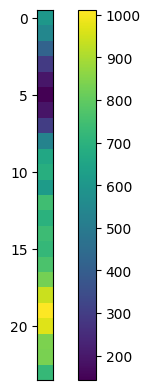

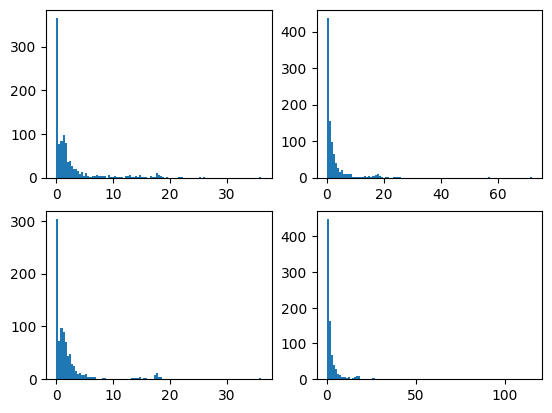

In [22]:
# 2.b

plt.imshow(hour_freq.sort_index().values.reshape(-1, 1), cmap='viridis')
plt.xticks([])
plt.colorbar()
plt.savefig('2b_1.png')
plt.show()
plt.close()

# peak hours : 19, 20, 18, 21

plt.subplot(2, 2, 1)
df_dist_19 = df.query('trip_start_hour == 19')['trip_miles']
bins = np.linspace(df_dist_19.min(), df_dist_19.max(), 100)
plt.hist(df_dist_19.values, bins)

plt.subplot(2, 2, 2)
df_dist_20 = df.query('trip_start_hour == 20')['trip_miles']
bins = np.linspace(df_dist_20.min(), df_dist_20.max(), 100)
plt.hist(df_dist_20.values, bins)

plt.subplot(2, 2, 3)
df_dist_18 = df.query('trip_start_hour == 18')['trip_miles']
bins = np.linspace(df_dist_18.min(), df_dist_18.max(), 100)
plt.hist(df_dist_18.values, bins)

plt.subplot(2, 2, 4)
df_dist_21 = df.query('trip_start_hour == 21')['trip_miles']
bins = np.linspace(df_dist_21.min(), df_dist_21.max(), 100)
plt.hist(df_dist_21.values, bins)
plt.savefig('2b_2.png')
plt.show()
plt.close()

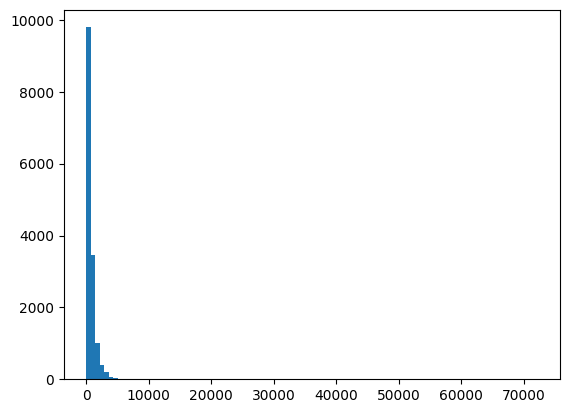

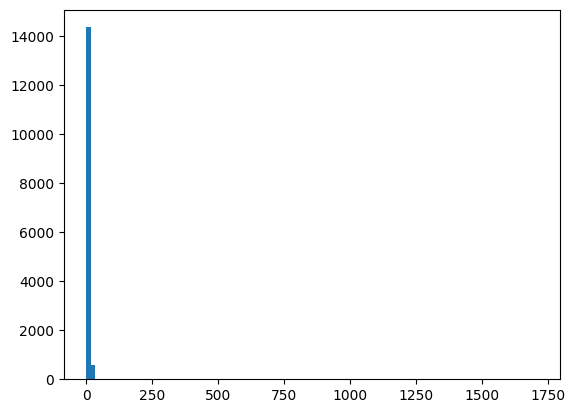

In [23]:
# 2.c (a)

df_times = df['trip_seconds']
plt.hist(df_times.values, bins=100)
plt.savefig('2c_1.png')
plt.show()
plt.close()

df_dist = df['trip_miles']
plt.hist(df_dist.values, bins=100)
plt.savefig('2c_2.png')
plt.show()
plt.close()

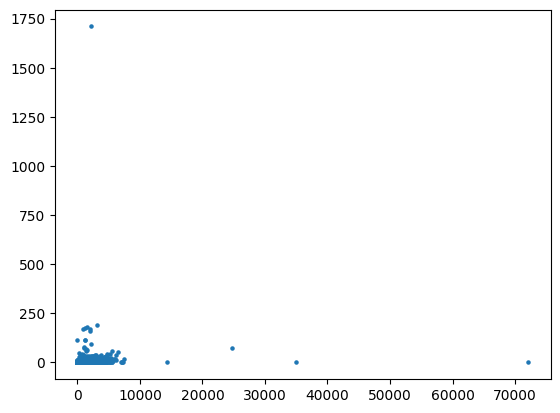

In [24]:
# 2.c (b)

plt.scatter(df_times, df_dist, s=5)
plt.savefig('2c_3')
plt.show()
plt.close()

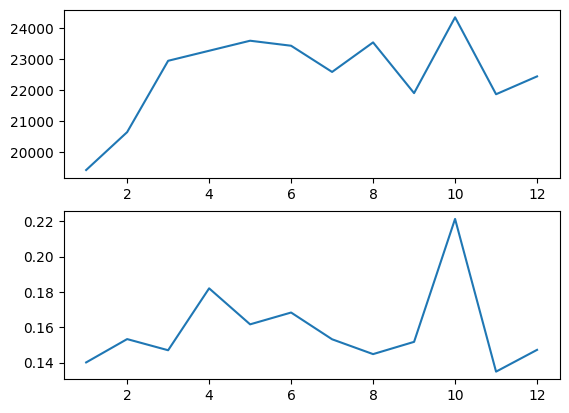

In [25]:
# 2.d

groups = df.groupby('trip_start_month')

months = [i for i in range(1, 13)]
number = [groups.get_group(i).size for i in range(1, 13)]
distance = [groups.get_group(i)['trip_miles'].sum()/number[i-1] for i in range(1, 13)]

plt.subplot(2, 1, 1)
plt.plot(months, number)
plt.subplot(2, 1, 2)
plt.plot(months, distance)
plt.savefig('2d_1.png')
plt.show()
plt.close()


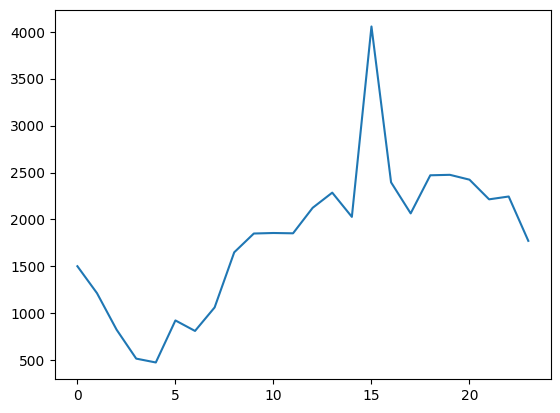

In [26]:
# 2.e

groups = df.groupby('trip_start_hour')

hours = [i for i in range(0, 24)]
distance = [groups.get_group(i)['trip_miles'].sum() for i in range(0, 24)]

plt.plot(hours, distance)
plt.savefig('2e_1.png')
plt.show()
plt.close()
